In [113]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
url='C:\\Users\\Lenovo\\ML\\Regression-linear\\yellow_tripdata_2018-01.csv'
df =pd.read_csv(url)

In [114]:
df.head()
df=df.dropna()
df.isnull().sum()

df.info()
#df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048574 entries, 1 to 1048574
Data columns (total 17 columns):
VendorID                 1048574 non-null float64
tpep_pickup_datetime     1048574 non-null object
tpep_dropoff_datetime    1048574 non-null object
passenger_count          1048574 non-null float64
trip_distance            1048574 non-null float64
RatecodeID               1048574 non-null float64
store_and_fwd_flag       1048574 non-null object
PULocationID             1048574 non-null float64
DOLocationID             1048574 non-null float64
payment_type             1048574 non-null float64
fare_amount              1048574 non-null float64
extra                    1048574 non-null float64
mta_tax                  1048574 non-null float64
tip_amount               1048574 non-null float64
tolls_amount             1048574 non-null float64
improvement_surcharge    1048574 non-null float64
total_amount             1048574 non-null float64
dtypes: float64(14), object(3)
memory us

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
1,1.0,1/1/2018 0:21,1/1/2018 0:24,1.0,0.5,1.0,N,41.0,24.0,2.0,4.5,0.5,0.5,0.00,0.0,0.3,5.80
2,1.0,1/1/2018 0:44,1/1/2018 1:03,1.0,2.7,1.0,N,239.0,140.0,2.0,14.0,0.5,0.5,0.00,0.0,0.3,15.30
3,1.0,1/1/2018 0:08,1/1/2018 0:14,2.0,0.8,1.0,N,262.0,141.0,1.0,6.0,0.5,0.5,1.00,0.0,0.3,8.30
4,1.0,1/1/2018 0:20,1/1/2018 0:52,1.0,10.2,1.0,N,140.0,257.0,2.0,33.5,0.5,0.5,0.00,0.0,0.3,34.80
5,1.0,1/1/2018 0:09,1/1/2018 0:27,2.0,2.5,1.0,N,246.0,239.0,1.0,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [62]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06
mean,1.575311e+00,1.639421e+00,2.899187e+00,1.048867e+00,1.634985e+02,1.613923e+02,1.382424e+00,1.237338e+01,3.398999e-01,4.968913e-01,1.646378e+00,3.233851e-01,2.995751e-01,1.548511e+01
std,4.942960e-01,1.275896e+00,3.910524e+00,4.166931e-01,6.669858e+01,7.073962e+01,5.061917e-01,1.193434e+01,4.934722e-01,4.270205e-02,2.565710e+00,1.989266e+00,1.511817e-02,1.454517e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.980000e+02,-4.500000e+00,-5.000000e-01,-2.000000e+00,-1.050000e+01,-3.000000e-01,-2.093000e+02
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.250000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.880000e+00
50%,2.000000e+00,1.000000e+00,1.510000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.150000e+00,0.000000e+00,3.000000e-01,1.080000e+01
75%,2.000000e+00,2.000000e+00,2.900000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.655000e+01
max,2.000000e+00,9.000000e+00,2.521000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.880000e+02,4.800000e+00,3.000000e+00,3.100000e+02,9.105000e+02,1.000000e+00,9.773000e+02


In [133]:
X=df['trip_distance']
Y=df['total_amount']


In [134]:

# calculate a 5-number summary
from numpy import percentile
from numpy.random import rand
# generate data sample
data = Y
# calculate quartiles
quartiles = percentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data.min(), data.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: -209.300
Q1: 7.880
Median: 10.800
Q3: 16.550
Max: 977.300


In [135]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=100)

In [136]:
x_train, x_test, y_train, y_test = x_train.values,x_test.values, y_train.values, y_test.values
x_train, x_test, y_train, y_test = x_train.reshape(-1, 1),x_test.reshape(-1, 1), y_train.reshape(-1, 1), y_test.reshape(-1, 1)

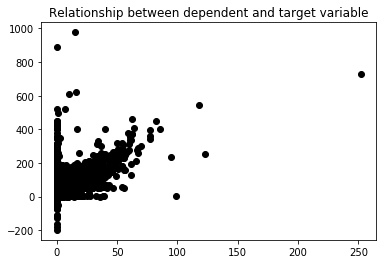

In [138]:
plt.title('Relationship between dependent and target variable')
plt.scatter(x_train, y_train,  color='black')
plt.show()

In [121]:
for i in range(10,12):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=100)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_test)
    model_score = LR.score(x_train,y_train)
    print(model_score)
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.2   1.21 18.63 ...  1.2   0.7  18.7 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [118]:
x_train, x_test, y_train, y_test = x_train.values,x_test.values, y_train.values, y_test.values
x_train, x_test, y_train_set, y_test_set = x_train_set.reshape(-1, 1),
x_test_set.reshape(-1, 1), y_train_set.reshape(-1, 1), y_test_set.reshape(-1, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [108]:
import statsmodels.formula.api as sn
X1 = np.append(arr = np.ones((1048574, 1)).astype(int), values = X, axis = 1)
X_opt=X1[:,:]
Y
regressor_stat=sn.OLS(endog =Y, exog = X_opt).fit()

regressor_stat.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 3.973e+06
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        18:12:35   Log-Likelihood:            -3.2665e+06
No. Observations:             1048574   AIC:                         6.533e+06
Df Residuals:                 1048572   BIC:                         6.533e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5033      0.007    679.254      0.000       4.490       4.516
x1             2.7146      0.001   1993.200      0.000       2.712       2.717
==============================================================================
Omnibus:                  2623038.987   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     164830459345.456
Skew:                          26.846   Prob(JB):                         0.00
Kurtosis:                    1944.596   Cond. No.                         6.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
x_train, x_test, y_train, y_test = x_train.values,x_test.values, y_train.values, y_test.values
x_train, x_test, y_train, y_test = x_train_set.reshape(-1, 1),x_test.reshape(-1, 1), y_train.reshape(-1, 1), y_test.reshape(-1, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [14]:


model_score = LR.score(x_train,y_train)

# Have a look at R sq to give an idea of the fit ,Explained variance score: 1 is perfect prediction

print('R sq: ',model_score)

print('Coefficients: ', LR.coef_)

# The mean squared error

print("Mean squared error: %.2f"

% mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(y_test, y_pred))

R sq:  0.8325036883701921
Coefficients:  [-6.06273525e-03  2.98298376e+00  1.01859364e-03 -4.32329858e-04
 -2.54551154e+00  1.32589421e+00]
Mean squared error: 38.49
Variance score: 0.82
